In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

global companies_set 

warnings.filterwarnings('ignore')

# 1 - Pré-Processamento

## 1.1 - Acessando planilha de dataset original

In [2]:
path = r"D:\Documentos_D\UFCG\2021.2e\TCC\Project\analise-de-indicador-tcc-ufcg\Data\indicadores_Siteware.csv"
base_df = pd.read_csv(path,sep =",")

print("Todas as colunas: ",base_df.columns)
print("\nTotal de linhas: %d linhas." % len(base_df))

Todas as colunas:  Index(['Indicador', 'Indicador_Polaridade', 'Acompanhamento_UnidadeGeren_ID',
       'Acompanhamento_TipoAcompa_ID', 'Acompanhamento_AgrupamentoTxt',
       'Dim1_Dimensao_ID', 'Dim1_Membro_ID', 'Dim2_Dimensao_ID',
       'Dim2_Membro_ID', 'Dim3_Dimensao_ID', 'Dim3_Membro_ID',
       'Dim4_Dimensao_ID', 'Dim4_Membro_ID', 'Dim5_Dimensao_ID',
       'Dim5_Membro_ID', 'Dim6_Dimensao_ID', 'Dim6_Membro_ID',
       'Solucao_Identificada', 'ID_Acompanhamento', 'IsCopy',
       'ID_AcompanhamentoCopy', 'Frequencia', 'Data_Ocorrencia',
       'Tipo_Registro', 'AreaResultado', 'AcumuloDimensao', 'Acumulo_Tempo',
       'Acompanhamento_Anual_LimiteInferior', 'Acompanhamento_Anual_Minimo',
       'Acompanhamento_Anual_Meta', 'Acompanhamento_Anual_LimiteSuperior',
       'Acompanhamento_Anual_MaxDesafio', 'Acompanhamento_Anual_Benchmark',
       'VLR_Ocorrencia', 'VLR_Meta', 'VLR_MetaInf', 'VLR_MetaSup',
       'Desempenho', 'PerTolAmr', 'PerTolAmrInf', 'PerTolVrd', 'PerTolVrdInf

## 1.2 - Filtrando e renomeando apenas as colunas necessárias para análise

In [3]:
df = base_df[['Indicador','Dim1_Membro_Mome','Dim2_Membro_Mome','Dim3_Membro_Mome','VLR_Ocorrencia','Tipo_Registro','Data_Ocorrencia']]

print("Tipo_Registro antes: ")
display(df['Tipo_Registro'])

df = df[df['Tipo_Registro'] == "Apurado"] #|------------> Remoção dos indicadores com "Tipo_Registro" == "acumulado"
print("Tipo_Registro depois: ")
display(df['Tipo_Registro']) 

df = df.drop(['Tipo_Registro','Indicador'],axis=1) # |--> Apenas o "Tipo_registro" == "apurado" está sendo considerado, mas esta coluna não fará parte da análise.
df.columns = ['Empresa','Canal_Distribuicao','Mercado','Volume_Venda','Data']

print("DataFrame sem as colunas 'Tipo_Registro' e 'Indicador':")
df

Tipo_Registro antes: 


0         Apurado
1         Apurado
2         Apurado
3         Apurado
4         Apurado
          ...    
8933    Acumulado
8934    Acumulado
8935    Acumulado
8936    Acumulado
8937    Acumulado
Name: Tipo_Registro, Length: 8938, dtype: object

Tipo_Registro depois: 


0       Apurado
1       Apurado
2       Apurado
3       Apurado
4       Apurado
         ...   
8921    Apurado
8922    Apurado
8923    Apurado
8924    Apurado
8925    Apurado
Name: Tipo_Registro, Length: 4469, dtype: object

DataFrame sem as colunas 'Tipo_Registro' e 'Indicador':


,Empresa,Canal_Distribuicao,Mercado,Volume_Venda,Data
0,NaN,NaN,NaN,63198.005,2015-01-01 00:00:00.000
1,NaN,NaN,NaN,107754.000,2015-02-01 00:00:00.000
2,NaN,NaN,NaN,118044.000,2015-03-01 00:00:00.000
3,NaN,NaN,NaN,75890.000,2015-04-01 00:00:00.000
4,NaN,NaN,NaN,102560.000,2015-05-01 00:00:00.000
...,...,...,...,...,...
8921,BR,MI,Brasil,NaN,2022-06-01 00:00:00.000
8922,BR,MI,Brasil,NaN,2022-07-01 00:00:00.000
8923,BR,MI,Brasil,NaN,2022-08-01 00:00:00.000
8924,BR,MI,Brasil,NaN,2022-09-01 00:00:00.000


## 1.3 - Tratamento e remoção das linhas com NaNs que serão desconsideradas

In [4]:
# Contando NaNs do dataframe apenas do valores do tipo_registro "Apurado" (total de 4469 linhas):
dim1_membro_mome_nan_sum = df.Empresa.isna().sum()
dim2_membro_mome_nan_sum = df.Canal_Distribuicao.isna().sum()
dim3_membro_mome_nan_sum = df.Mercado.isna().sum()
vlr_ocorrencia_nan_sum = df.Volume_Venda.isna().sum()

print("Quantidade de NaNs de empresa (Dim1_Membro_Mome): ",dim1_membro_mome_nan_sum)
print("Quantidade de NaNs de canal de distribuição (Dim2_Membro_Mome): ", dim2_membro_mome_nan_sum)
print("Quantidade de NaNs de mercado (Dim3_Membro_Mome): ", dim3_membro_mome_nan_sum)
print("Quantidade de NaNs dos volumes de venda (VLR_Ocorrencia): ", vlr_ocorrencia_nan_sum)

Quantidade de NaNs de empresa (Dim1_Membro_Mome):  1020
Quantidade de NaNs de canal de distribuição (Dim2_Membro_Mome):  756
Quantidade de NaNs de mercado (Dim3_Membro_Mome):  1416
Quantidade de NaNs dos volumes de venda (VLR_Ocorrencia):  458


In [5]:
# Substituindo os valores NaNs pela string 'NaN':
# Confirmando: só existem valores de ocorrencia até 2022-01-01 (Janeiro de 2022) - linha '8916': estas linhas com valor de ocorrencia vazios serão removidas
df = df.fillna("NaN")
df

,Empresa,Canal_Distribuicao,Mercado,Volume_Venda,Data
0,NaN,NaN,NaN,63198.005,2015-01-01 00:00:00.000
1,NaN,NaN,NaN,107754.0,2015-02-01 00:00:00.000
2,NaN,NaN,NaN,118044.0,2015-03-01 00:00:00.000
3,NaN,NaN,NaN,75890.0,2015-04-01 00:00:00.000
4,NaN,NaN,NaN,102560.0,2015-05-01 00:00:00.000
...,...,...,...,...,...
8921,BR,MI,Brasil,NaN,2022-06-01 00:00:00.000
8922,BR,MI,Brasil,NaN,2022-07-01 00:00:00.000
8923,BR,MI,Brasil,NaN,2022-08-01 00:00:00.000
8924,BR,MI,Brasil,NaN,2022-09-01 00:00:00.000


### 1.3.1 - Filtrando dataframe com apenas as linhas que possuem pelo menos Empresa (dimensão 1)

In [6]:
df = df[ 
                           ((df.Empresa != "NaN") & (df.Canal_Distribuicao == "NaN") & (df.Mercado == "NaN"))
                          |((df.Empresa != "NaN") & (df.Canal_Distribuicao != "NaN") & (df.Mercado == "NaN"))
                          |((df.Empresa != "NaN") & (df.Canal_Distribuicao != "NaN") & (df.Mercado != "NaN"))
                        #   |((df.Empresa == "NaN") & (df.Canal_Distribuicao != "NaN") & (df.Mercado != "NaN")) # sem explicação;
                        #   |((df.Empresa == "NaN") & (df.Canal_Distribuicao == "NaN") & (df.Mercado != "NaN")) # Não ocorre; 
                        #   |((df.Empresa == "NaN") & (df.Canal_Distribuicao == "NaN") & (df.Mercado == "NaN")) # Existem 228 casos;
                          ]
df

,Empresa,Canal_Distribuicao,Mercado,Volume_Venda,Data
48,BC,NaN,NaN,10070.0,2015-01-01 00:00:00.000
49,BC,NaN,NaN,9434.0,2015-02-01 00:00:00.000
50,BC,NaN,NaN,14882.0,2015-03-01 00:00:00.000
51,BC,NaN,NaN,12618.0,2015-04-01 00:00:00.000
52,BC,NaN,NaN,8516.0,2015-05-01 00:00:00.000
...,...,...,...,...,...
8921,BR,MI,Brasil,NaN,2022-06-01 00:00:00.000
8922,BR,MI,Brasil,NaN,2022-07-01 00:00:00.000
8923,BR,MI,Brasil,NaN,2022-08-01 00:00:00.000
8924,BR,MI,Brasil,NaN,2022-09-01 00:00:00.000


### 1.3.2 - Removendo do dataframe linhas que possuem o "Valor de Ocorrência" vazio

In [7]:
df = df[(df.Volume_Venda != "NaN")].reset_index()

In [8]:
# Reconfigurando os índices:
new_index = []
for i in range(len(df)):
    new_index.append(i+1)
df = df.set_index(pd.Index(new_index))
del df['index']

print("Dataframe totalmente filtrado e preparado para análises:")
df

Dataframe totalmente filtrado e preparado para análises:


,Empresa,Canal_Distribuicao,Mercado,Volume_Venda,Data
1,BC,NaN,NaN,10070.0,2015-01-01 00:00:00.000
2,BC,NaN,NaN,9434.0,2015-02-01 00:00:00.000
3,BC,NaN,NaN,14882.0,2015-03-01 00:00:00.000
4,BC,NaN,NaN,12618.0,2015-04-01 00:00:00.000
5,BC,NaN,NaN,8516.0,2015-05-01 00:00:00.000
...,...,...,...,...,...
3094,BI,ME,Europa,33926.0,2022-01-01 00:00:00.000
3095,BR,EE,NaN,79980.0,2022-01-01 00:00:00.000
3096,BR,EE,Ásia,22100.0,2022-01-01 00:00:00.000
3097,BR,EE,Europa,57880.0,2022-01-01 00:00:00.000


# 2 - Análise Exploratório dos Dados

## 2.1 - Análise das "Empresas", dos "Canais de Distribuição" e dos "Mercados"

In [9]:
empresas = df.Empresa.unique()
canais = df.Canal_Distribuicao.unique()
mercados = df.Mercado.unique()

print("Empresas: ", empresas)
print("Canais: ", canais)
print("Mercado: ", mercados)

Empresas:  ['BC' 'BI' 'BR' 'BT']
Canais:  ['NaN' 'ME' 'EE' 'MI']
Mercado:  ['NaN' 'Am.Norte' 'Ásia' 'Europa' 'Am.Latina' 'Japão' 'Brasil']


In [10]:
# Substituindo os nomes dos mercados, para omitir informações possivelmente confidenciais:
df['Mercado'] = df['Mercado'].replace(['Am.Norte','Ásia','Europa','Am.Latina','Japão','Brasil'],
                                      [   'R1'   , 'R2' ,  'R3'  ,    'R4'   ,  'R5' ,  'R6'  ])
df

,Empresa,Canal_Distribuicao,Mercado,Volume_Venda,Data
1,BC,NaN,NaN,10070.0,2015-01-01 00:00:00.000
2,BC,NaN,NaN,9434.0,2015-02-01 00:00:00.000
3,BC,NaN,NaN,14882.0,2015-03-01 00:00:00.000
4,BC,NaN,NaN,12618.0,2015-04-01 00:00:00.000
5,BC,NaN,NaN,8516.0,2015-05-01 00:00:00.000
...,...,...,...,...,...
3094,BI,ME,R3,33926.0,2022-01-01 00:00:00.000
3095,BR,EE,NaN,79980.0,2022-01-01 00:00:00.000
3096,BR,EE,R2,22100.0,2022-01-01 00:00:00.000
3097,BR,EE,R3,57880.0,2022-01-01 00:00:00.000


### 2.1.1 - Agrupamento de Mercados, por Canais, por Empresa

In [11]:
group_by_empresa = df.groupby(['Empresa'])
group_by_canal = df.groupby(['Canal_Distribuicao'])
group_by_mercado = df.groupby(['Mercado'])

companies_set = [] 
# .sort_values(by=['Data_Ocorrencia'])
for company_name in empresas:
    temp_df = group_by_empresa.get_group(company_name)
    #del  empresa_df['index']
    companies_set.append((company_name, temp_df))

for tpl in companies_set:
    print(tpl[0])
    group = tpl[1].groupby(['Canal_Distribuicao','Mercado']).size()
    group = group.to_frame(name = 'Qtd')
    display(group)


BC


Qtd
Canal_Distribuicao Mercado     
ME                 NaN      121
                   R1       193
NaN                NaN      121

BI


Qtd
Canal_Distribuicao Mercado     
ME                 NaN      121
                   R2       193
                   R3       193
                   R5        65
NaN                NaN      121

BR


Qtd
Canal_Distribuicao Mercado     
EE                 NaN      121
                   R1       144
                   R2       193
                   R3       145
                   R4       131
                   R5       168
ME                 NaN      121
MI                 R6       169
NaN                NaN      121

BT


Qtd
Canal_Distribuicao Mercado     
ME                 NaN      103
                   R2       173
                   R4       127
                   R5       151
NaN                NaN      103

## 2.2 - Médias de Volume de Vendas

### 2.2.1 - Mercado/Ano/Região

#### BC - ME - R1

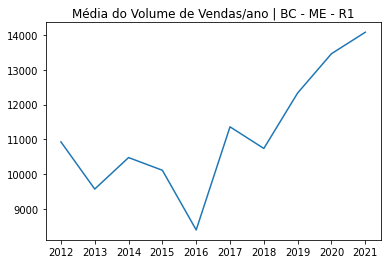

In [12]:
cmp_df = companies_set[0][1] # Empresa BC (1ª empresa)
cmp_df = cmp_df.sort_values(by='Data')
cmp_df = cmp_df[((cmp_df.Empresa != "NaN") & (cmp_df.Canal_Distribuicao != "NaN") & (cmp_df.Mercado == "NaN"))] # Só tem uma região e um mercado

means_bc_me_r1 = []
year = 2012
while year < 2022: # so tem a entrada de janeiro no ano de 2022;
    query = cmp_df[((cmp_df.Data >= str(year)) & (cmp_df.Data < str(year+1)))]
    mean = np.round(query['Volume_Venda'].mean(),4)
    means_bc_me_r1.append(mean)
    year += 1

means = means_bc_me_r1
bars = ['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
y_pos = np.arange(len(bars))
plt.title("Média do Volume de Vendas/ano | "+ companies_set[0][0]+" - ME - R1")
plt.plot(y_pos, means)
plt.xticks(y_pos, bars)
plt.show()

##### BI - ME - R2

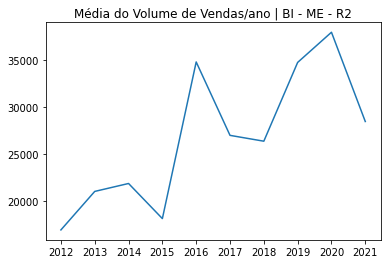

In [13]:
cmp_df = companies_set[1][1]
cmp_df = cmp_df[(cmp_df.Canal_Distribuicao == 'ME') & (cmp_df.Mercado == "R2") ]
cmp_df = cmp_df.sort_values(by='Data')
cmp_df = cmp_df[((cmp_df.Empresa != "NaN") & (cmp_df.Canal_Distribuicao != "NaN") & (cmp_df.Mercado != "NaN") & (cmp_df.Volume_Venda != 0))] # Tem zeros e Mercado tem valor NaN
cmp_df = cmp_df.drop_duplicates('Volume_Venda')

means_bi_me_r2 = []
year = 2012
while year < 2022: # so tem a entrada de janeiro no ano de 2022;
    query = cmp_df[((cmp_df.Data >= str(year)) & (cmp_df.Data < str(year+1)))]
    mean = np.round(query['Volume_Venda'].mean(),4)
    means_bi_me_r2.append(mean)
    year += 1

means = means_bi_me_r2
bars = ['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
y_pos = np.arange(len(bars))
plt.title("Média do Volume de Vendas/ano | "+ companies_set[1][0]+" - ME - R2")
plt.plot(y_pos, means)
plt.xticks(y_pos, bars)
plt.show()

##### BI - ME - R3

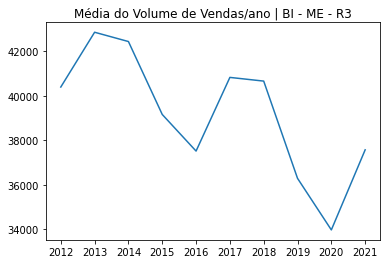

In [14]:
cmp_df = companies_set[1][1] 
cmp_df = cmp_df[(cmp_df.Canal_Distribuicao == 'ME') & (cmp_df.Mercado == "R3") ]
cmp_df = cmp_df.sort_values(by='Data')
cmp_df['Volume_Venda'] = cmp_df['Volume_Venda'].astype(float,errors = 'raise')
cmp_df = cmp_df[((cmp_df.Empresa != "NaN") & (cmp_df.Canal_Distribuicao != "NaN") & (cmp_df.Mercado != "NaN") & (cmp_df.Volume_Venda != 0))] # tem 10 zeros e Mercado nao tem NaNs
cmp_df = cmp_df.sort_values(by='Volume_Venda').drop_duplicates('Data',keep='last').reset_index(0)
cmp_df = cmp_df.sort_values(by='Data')

means_bi_me_r3 = []
year = 2012
while year < 2022: 
    query = cmp_df[((cmp_df.Data >= str(year)) & (cmp_df.Data < str(year+1)))]
    mean = np.round(query['Volume_Venda'].mean(),4)
    means_bi_me_r3.append(mean)
    year += 1

means = means_bi_me_r3
bars = ['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
y_pos = np.arange(len(bars))
plt.title("Média do Volume de Vendas/ano | "+ companies_set[1][0]+" - ME - R3")
plt.plot(y_pos, means)
plt.xticks(y_pos, bars)
plt.show()

##### BI - ME - R5

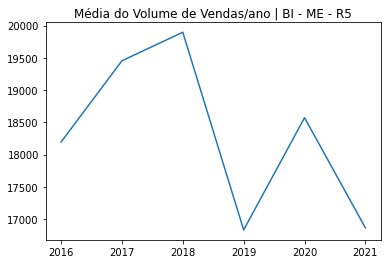

In [15]:
cmp_df = companies_set[1][1]
cmp_df = cmp_df[(cmp_df.Canal_Distribuicao == 'ME') & (cmp_df.Mercado == "R5") ]
cmp_df = cmp_df.sort_values(by='Data') # So começa a ter valores de ocorrencia a partir de "Agosto 2016"; (IMPORTANTE!) Não tem caso de 2022
cmp_df = cmp_df[((cmp_df.Empresa != "NaN") & (cmp_df.Canal_Distribuicao != "NaN") & (cmp_df.Mercado != "NaN"))] # não tem zeros e mercado nao tem NaN;

means_bi_me_r5 = []
year = 2016
while year < 2022: 
    query = cmp_df[((cmp_df.Data >= str(year)) & (cmp_df.Data < str(year+1)))]
    mean = np.round(query['Volume_Venda'].mean(),4)
    means_bi_me_r5.append(mean)
    year += 1

means = means_bi_me_r5
bars = ['2016','2017','2018','2019','2020','2021']
y_pos = np.arange(len(bars))
plt.title("Média do Volume de Vendas/ano | "+ companies_set[1][0]+" - ME - R5")
plt.plot(y_pos, means)
plt.xticks(y_pos, bars)
plt.show()

##### BR - EE - R1

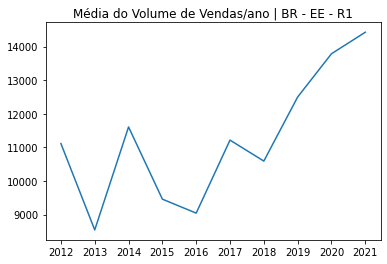

In [16]:
cmp_df = companies_set[2][1]
cmp_df = cmp_df[(cmp_df.Canal_Distribuicao == 'EE') & (cmp_df.Mercado == "R1") ]
cmp_df = cmp_df[((cmp_df.Empresa != "NaN") & (cmp_df.Canal_Distribuicao != "NaN") & (cmp_df.Mercado != "NaN"))]
cmp_df = cmp_df.sort_values(by='Volume_Venda').reset_index()
cmp_df = cmp_df.drop_duplicates('Data',keep='last').sort_values(by='Data')

means_br_ee_r1 = []
year = 2012
while year < 2022: 
    query = cmp_df[((cmp_df.Data >= str(year)) & (cmp_df.Data < str(year+1)))]
    mean = np.round(query['Volume_Venda'].mean(),4)
    means_br_ee_r1.append(mean)
    year += 1

means = means_br_ee_r1
bars = ['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
y_pos = np.arange(len(bars))
plt.title("Média do Volume de Vendas/ano | "+ companies_set[2][0]+" - EE - R1")
plt.plot(y_pos, means)
plt.xticks(y_pos, bars)
plt.show()

##### BR - EE - R2

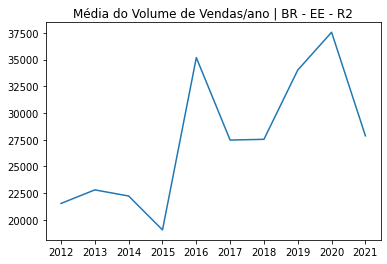

In [17]:
cmp_df = companies_set[2][1]
cmp_df = cmp_df[(cmp_df.Canal_Distribuicao == 'EE') & (cmp_df.Mercado == "R2") ]
cmp_df = cmp_df[((cmp_df.Empresa != "NaN") & (cmp_df.Canal_Distribuicao != "NaN") & (cmp_df.Mercado != "NaN"))]
cmp_df = cmp_df.sort_values(by='Volume_Venda').reset_index()
cmp_df = cmp_df.drop_duplicates('Data',keep='last').sort_values(by='Data')

means_br_ee_r2 = []
year = 2012
while year < 2022: 
    query = cmp_df[((cmp_df.Data >= str(year)) & (cmp_df.Data < str(year+1)))]
    mean = np.round(query['Volume_Venda'].mean(),4)
    means_br_ee_r2.append(mean)
    year += 1
    
means = means_br_ee_r2
bars = ['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
y_pos = np.arange(len(bars))
plt.title("Média do Volume de Vendas/ano | "+ companies_set[2][0]+" - EE - R2")
plt.plot(y_pos, means)
plt.xticks(y_pos, bars)
plt.show()

##### BR - EE - R3

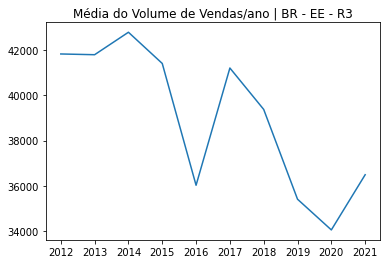

In [18]:
cmp_df = companies_set[2][1]
cmp_df = cmp_df[(cmp_df.Canal_Distribuicao == 'EE') & (cmp_df.Mercado == "R3") ]
cmp_df = cmp_df[((cmp_df.Empresa != "NaN") & (cmp_df.Canal_Distribuicao != "NaN") & (cmp_df.Mercado != "NaN"))]
cmp_df = cmp_df.sort_values(by='Volume_Venda').reset_index()
cmp_df = cmp_df.drop_duplicates('Data',keep='last').sort_values(by='Data')

means_br_ee_r3 = []
year = 2012
while year < 2022:
    query = cmp_df[((cmp_df.Data >= str(year)) & (cmp_df.Data < str(year+1)))]
    mean = np.round(query['Volume_Venda'].mean(),4)
    means_br_ee_r3.append(mean)
    year += 1
    
#--- Plotando o Gráfico ---#
means = means_br_ee_r3
bars = ['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
y_pos = np.arange(len(bars))
plt.title("Média do Volume de Vendas/ano | "+ companies_set[2][0]+" - EE - R3")
plt.plot(y_pos, means)
plt.xticks(y_pos, bars)
plt.show()

##### BR - EE - R4

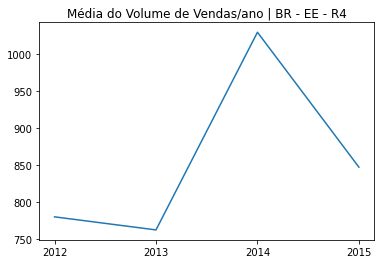

In [19]:
cmp_df = companies_set[2][1]
cmp_df = cmp_df[(cmp_df.Canal_Distribuicao == 'EE') & (cmp_df.Mercado == "R4") ]
cmp_df = cmp_df[((cmp_df.Empresa != "NaN") & (cmp_df.Canal_Distribuicao != "NaN") & (cmp_df.Mercado != "NaN"))]
cmp_df = cmp_df.sort_values(by='Volume_Venda').reset_index()
cmp_df = cmp_df.drop_duplicates('Data',keep='last').sort_values(by='Data')

means_br_ee_r4 = []
year = 2012
while year < 2016: # So tem ate 01 Janeiro de 2016. Desconsiderei 2016;
    query = cmp_df[((cmp_df.Data >= str(year)) & (cmp_df.Data < str(year+1)))]
    mean = np.round(query['Volume_Venda'].mean(),4)
    means_br_ee_r4.append(mean)
    year += 1
    
means = means_br_ee_r4
bars = ['2012','2013','2014','2015']
y_pos = np.arange(len(bars))
plt.title("Média do Volume de Vendas/ano | "+ companies_set[2][0]+" - EE - R4")
plt.plot(y_pos, means)
plt.xticks(y_pos, bars)
plt.show()

##### BR - EE - R5

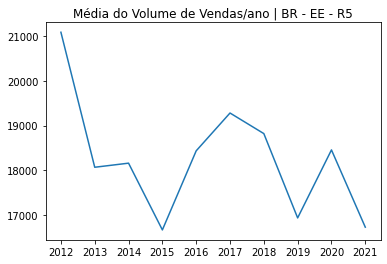

In [20]:
cmp_df = companies_set[2][1]
cmp_df = cmp_df[(cmp_df.Canal_Distribuicao == 'EE') & (cmp_df.Mercado == "R5")]
cmp_df = cmp_df[((cmp_df.Empresa != "NaN") & (cmp_df.Canal_Distribuicao != "NaN") & (cmp_df.Mercado != "NaN"))] 
cmp_df = cmp_df.sort_values(by='Volume_Venda').reset_index()
cmp_df = cmp_df.drop_duplicates('Data',keep='last').sort_values(by='Data')

means_br_ee_r5 = []
year = 2012
while year < 2022:
    query = cmp_df[((cmp_df.Data >= str(year)) & (cmp_df.Data < str(year+1)))]
    mean = np.round(query['Volume_Venda'].mean(),4)
    means_br_ee_r5.append(mean)
    year += 1

means = means_br_ee_r5
bars = ['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
y_pos = np.arange(len(bars))
plt.title("Média do Volume de Vendas/ano | "+ companies_set[2][0]+" - EE - R5")
plt.plot(y_pos, means)
plt.xticks(y_pos, bars)
plt.show()

##### BR - ME - "sem região"

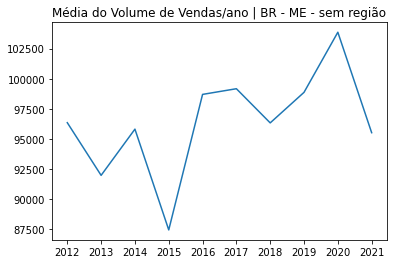

In [21]:
cmp_df = companies_set[2][1]
cmp_df = cmp_df[(cmp_df.Canal_Distribuicao == 'ME')]
cmp_df = cmp_df[((cmp_df.Empresa != "NaN") & (cmp_df.Canal_Distribuicao != "NaN") & (cmp_df.Mercado == "NaN"))] 
cmp_df = cmp_df.sort_values(by='Volume_Venda').reset_index()
cmp_df = cmp_df.drop_duplicates('Data',keep='last').sort_values(by='Data')

means_br_me = []
year = 2012
while year < 2022:
    query = cmp_df[((cmp_df.Data >= str(year)) & (cmp_df.Data < str(year+1)))]
    mean = np.round(query['Volume_Venda'].mean(),4)
    means_br_me.append(mean)
    year += 1

means = means_br_me
bars = ['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
y_pos = np.arange(len(bars))
plt.title("Média do Volume de Vendas/ano | "+ companies_set[2][0]+" - ME - sem região")
plt.plot(y_pos, means)
plt.xticks(y_pos, bars)
plt.show()

##### BR - MI - R6

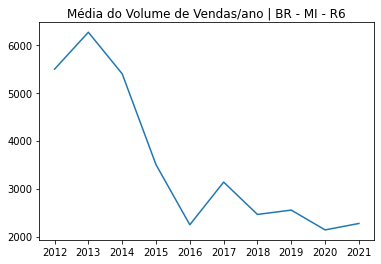

In [22]:
cmp_df = companies_set[2][1]
cmp_df = cmp_df[((cmp_df.Canal_Distribuicao == 'MI') & (cmp_df.Mercado == 'R6'))]
cmp_df = cmp_df[((cmp_df.Empresa != "NaN") & (cmp_df.Canal_Distribuicao != "NaN") & (cmp_df.Mercado != "NaN"))] 
cmp_df = cmp_df.sort_values(by='Volume_Venda').reset_index()
cmp_df = cmp_df.drop_duplicates('Data',keep='last').sort_values(by='Data')

means_br_mi_r6 = []
year = 2012
while year < 2022:
    query = cmp_df[((cmp_df.Data >= str(year)) & (cmp_df.Data < str(year+1)))]
    mean = np.round(query['Volume_Venda'].mean(),4)
    means_br_mi_r6.append(mean)
    year += 1

means = means_br_mi_r6
bars = ['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
y_pos = np.arange(len(bars))
plt.title("Média do Volume de Vendas/ano | "+ companies_set[2][0]+" - MI - R6")
plt.plot(y_pos, means)
plt.xticks(y_pos, bars)
plt.show()

##### BT - ME - R2

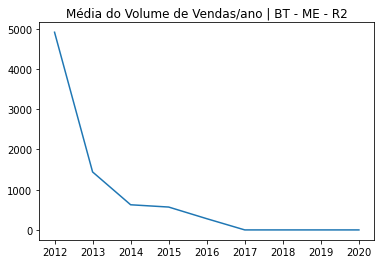

In [23]:
cmp_df = companies_set[3][1]
cmp_df = cmp_df[((cmp_df.Canal_Distribuicao == 'ME') & (cmp_df.Mercado == 'R2'))] # só vai ate 07/2020
cmp_df = cmp_df[((cmp_df.Empresa != "NaN") & (cmp_df.Canal_Distribuicao != "NaN") & (cmp_df.Mercado != "NaN"))] 
cmp_df = cmp_df.sort_values(by='Volume_Venda').reset_index()
cmp_df = cmp_df.drop_duplicates('Data',keep='last').sort_values(by='Data')

means_bt_me_r2 = []
year = 2012
while year < 2021:
    query = cmp_df[((cmp_df.Data >= str(year)) & (cmp_df.Data < str(year+1)))]
    mean = np.round(query['Volume_Venda'].mean(),4)
    means_bt_me_r2.append(mean)
    year += 1

means = means_bt_me_r2
bars = ['2012','2013','2014','2015','2016','2017','2018','2019','2020']
y_pos = np.arange(len(bars))
plt.title("Média do Volume de Vendas/ano | "+ companies_set[3][0]+" - ME - R2")
plt.plot(y_pos, means)
plt.xticks(y_pos, bars)
plt.show()

##### BT - ME - R4

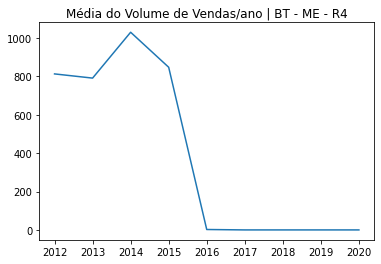

In [24]:
cmp_df = companies_set[3][1]
cmp_df = cmp_df[((cmp_df.Canal_Distribuicao == 'ME') & (cmp_df.Mercado == 'R4'))] # só vai ate 07/2020
cmp_df = cmp_df[((cmp_df.Empresa != "NaN") & (cmp_df.Canal_Distribuicao != "NaN") & (cmp_df.Mercado != "NaN"))] 
cmp_df = cmp_df.sort_values(by='Volume_Venda').reset_index()
cmp_df = cmp_df.drop_duplicates('Data',keep='last').sort_values(by='Data')

means_bt_me_r4 = []
year = 2012
while year < 2021:
    query = cmp_df[((cmp_df.Data >= str(year)) & (cmp_df.Data < str(year+1)))]
    mean = np.round(query['Volume_Venda'].mean(),4)
    means_bt_me_r4.append(mean)
    year += 1

means = means_bt_me_r4
bars = ['2012','2013','2014','2015','2016','2017','2018','2019','2020']
y_pos = np.arange(len(bars))

plt.title("Média do Volume de Vendas/ano | "+ companies_set[3][0]+" - ME - R4")
plt.plot(y_pos, means)
plt.xticks(y_pos, bars)
plt.show()

##### BT - ME - R5

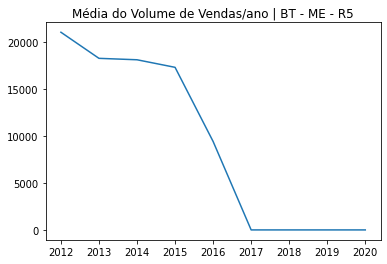

In [25]:
cmp_df = companies_set[3][1]
cmp_df = cmp_df[((cmp_df.Canal_Distribuicao == 'ME') & (cmp_df.Mercado == 'R5'))] # só vai ate 07/2020
cmp_df = cmp_df[((cmp_df.Empresa != "NaN") & (cmp_df.Canal_Distribuicao != "NaN") & (cmp_df.Mercado != "NaN"))] 
cmp_df = cmp_df.sort_values(by='Volume_Venda').reset_index()
cmp_df = cmp_df.drop_duplicates('Data',keep='last').sort_values(by='Data')

means_bt_me_r5 = []
year = 2012
while year < 2021:
    query = cmp_df[((cmp_df.Data >= str(year)) & (cmp_df.Data < str(year+1)))]
    mean = np.round(query['Volume_Venda'].mean(),4)
    means_bt_me_r5.append(mean)
    year += 1

means = means_bt_me_r5
bars = ['2012','2013','2014','2015','2016','2017','2018','2019','2020']
y_pos = np.arange(len(bars))

plt.title("Média do Volume de Vendas/ano | "+ companies_set[3][0]+" - ME - R5")
plt.plot(y_pos, means)
plt.xticks(y_pos, bars)
plt.show()

### 2.2.2 - Canal/Ano e Canal/Trimestre

## 2.3 - Distribuição de Vendas